In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats.stats import pearsonr
from IPython.display import display, Markdown, Latex
plt.style.use('ggplot')
from datetime import date
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from seaborn_qqplot import pplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas

import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_99296/3986780640.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [5]:
clean_nw = gpd.read_file(data_path + 'nw_clean_shape/nw_clean_shape.shp')

In [6]:
clean_nw = clean_nw.dissolve(by='location')

In [7]:
heatwave_control = pd.read_csv(data_path + "mobility_heat/final_multivariate_clean_90.csv")

## Heat-control days difference

In [60]:
heatwave_control.groupby('state')['location'].describe()

,count,unique,top,freq
state,,,,
British Columbia,1249,24,"East Kootenay, British Columbia",62
California,2656,56,"Tulare County, California",65
Oregon,1659,34,"Deschutes County, Oregon",63
Washington,1819,36,"Benton County, Washington",67


In [14]:
heatwave_control['date_heat'] = pd.to_datetime(heatwave_control['date_heat'])

In [15]:
heatwave_control['control_day'] = pd.to_datetime(heatwave_control['control_day'])

In [21]:
heatwave_control['date_diff'] = pd.Series(heatwave_control['date_heat'] - heatwave_control['control_day'])

In [29]:
heatwave_control['date_diff'] = [x.days for x in heatwave_control['date_diff']]

In [32]:
abs(heatwave_control['date_diff']).describe()

count    7383.000000
mean       10.586753
std         5.350340
min         7.000000
25%         7.000000
50%         7.000000
75%        14.000000
max        49.000000
Name: date_diff, dtype: float64

## Methods section avg variable

In [34]:
heatwave_control['temperature_2m_heat'].describe()

count    7383.000000
mean       33.835304
std         4.978163
min        19.266854
25%        30.337531
50%        34.054471
75%        37.210617
max        47.154137
Name: temperature_2m_heat, dtype: float64

In [35]:
heatwave_control['temp_diff'].describe()

count    7383.000000
mean        7.852157
std         3.777522
min         1.303160
25%         5.052800
50%         7.175871
75%         9.928045
max        25.339561
Name: temp_diff, dtype: float64

In [37]:
heatwave_control.drop_duplicates('location')['temperature_2m_winter'].describe()

count    150.000000
mean       3.670919
std        5.495883
min      -16.389372
25%        0.942652
50%        4.453752
75%        7.436603
max       14.461462
Name: temperature_2m_winter, dtype: float64

In [40]:
heatwave_control.drop_duplicates('heat_ID')['year'].value_counts()

2022    764
2021    745
2020    524
Name: year, dtype: int64

In [43]:
heatwave_control.drop_duplicates('heat_ID')['june_hw'].describe()

count    2033.000000
mean        0.145598
std         0.352789
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: june_hw, dtype: float64

In [45]:
heatwave_control.drop_duplicates('heat_ID')['heatwave_dur'].value_counts()

<5 days     1485
>=5 days     548
Name: heatwave_dur, dtype: int64

In [46]:
heatwave_control['stage_frac'].describe()

count    7383.000000
mean       63.109664
std        28.408363
min         8.333333
25%        40.000000
50%        62.500000
75%       100.000000
max       100.000000
Name: stage_frac, dtype: float64

In [47]:
heatwave_control['weekend'].describe()

count    7383.000000
mean        0.274008
std         0.446043
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: weekend, dtype: float64

In [48]:
heatwave_control.drop_duplicates('location')['coast_binary'].describe()

count    150.000000
mean       0.300000
std        0.459793
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: coast_binary, dtype: float64

In [49]:
heatwave_control.drop_duplicates('location')['popdens_dec'].describe()

count    150.000000
mean       5.773333
std        2.800160
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: popdens_dec, dtype: float64

In [50]:
heatwave_control.drop_duplicates('location')['income_dec'].describe()

count    150.000000
mean       5.606667
std        2.914662
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: income_dec, dtype: float64

In [51]:
heatwave_control.drop_duplicates('location')['nonwhite_dec'].describe()

count    150.000000
mean       5.573333
std        2.938627
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: nonwhite_dec, dtype: float64

In [52]:
heatwave_control.drop_duplicates('location')['over65_dec'].describe()

count    150.000000
mean       5.326667
std        2.817721
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: over65_dec, dtype: float64

### Results descriptive statistics

In [54]:
heatwave_control.groupby('state')['temperature_2m_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1249.0,27.950529,3.316384,19.266854,25.864297,27.646685,29.746177,40.556122
California,2656.0,36.803935,4.222549,24.768563,34.043009,36.818277,39.947818,47.154137
Oregon,1659.0,33.800141,3.049116,23.828261,32.407309,33.875316,35.520793,44.416451
Washington,1819.0,33.573476,4.671580,20.540545,30.084286,33.685631,37.084741,46.928690


In [56]:
heatwave_control.drop_duplicates('heat_ID').groupby('state')['Heat Wave Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,298.0,4.265101,2.205027,2.0,2.0,4.0,6.0,11.0
California,721.0,3.812760,2.168500,2.0,2.0,3.0,5.0,11.0
Oregon,518.0,3.393822,1.841736,2.0,2.0,3.0,4.0,11.0
Washington,496.0,3.822581,1.926103,2.0,2.0,3.0,5.0,12.0


In [59]:
heatwave_control[['residential_difference', 'workplaces_difference', 'transit_difference', 'grocery_pharmacy_difference', 'retail_difference', 'parks_difference']].describe()

,residential_difference,workplaces_difference,transit_difference,grocery_pharmacy_difference,retail_difference,parks_difference
count,5829.000000,6996.000000,4053.000000,5386.000000,6272.000000,3348.000000
mean,-0.054555,-0.590766,-0.679250,0.764946,0.415497,-3.985663
std,1.692501,3.999381,8.014779,6.049570,6.552138,26.289017
min,-6.000000,-25.000000,-31.000000,-23.000000,-25.000000,-99.000000
25%,-1.000000,-2.000000,-5.000000,-3.000000,-3.000000,-18.000000
50%,0.000000,0.000000,-1.000000,0.000000,0.000000,-6.000000
75%,1.000000,1.000000,3.000000,4.000000,3.000000,6.000000
max,6.000000,22.000000,30.000000,23.000000,25.000000,99.000000


### State Plot

In [7]:
location_temps = pd.DataFrame(heatwave_control.groupby('location')['temperature_2m_heat'].mean()).reset_index()
location_temps = gpd.GeoDataFrame(location_temps.merge(clean_nw, on='location'))
location_temps.to_crs(epsg=3857, inplace=True)
clean_nw.to_crs(epsg=3857, inplace=True)



In [8]:
import matplotlib.image as img

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

im=img.imread(r'/Users/shivyucel/Documents/projects/DPhil/Code_Data/misc/north_arrow.jpeg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


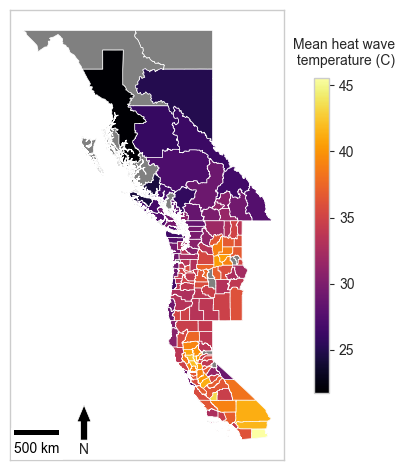

In [9]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
clean_nw.plot(ax=ax, color='grey')
location_temps.plot(column='temperature_2m_heat', legend=True, ax=ax, cmap='inferno', legend_kwds={'shrink': 0.7})
ax.add_artist(ScaleBar(1, location='lower left')  )
ax.set_yticks([])
ax.set_xticks([])
ax.legend(loc=(1, .83),
          fontsize=15,
          frameon=False,
          title="Mean heat wave \n temperature (C)")

x, y, arrow_length = 0.27, 0.122, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=10),
            ha='center', va='center', fontsize=10,
            xycoords=ax.transAxes)


plt.tight_layout()
plt.savefig("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/heat_state_plot_v6.png", dpi=400)


In [67]:
location_temps.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/state_maps/location_temps.shp')

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_28902/2682032165.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  location_temps.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/state_maps/location_temps.shp')
